# e.g. 3: Examine 3d winds for jet structures...

# last edited 25 July 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

###

import socket
import re
import os
import sys
import inspect
import pickle
import glob

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  nino_indices, \
  plot_xy

from n_data_funcs import n_data_funcs
  
cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

output_name='eg3.pkl'
input_name=output_name

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
END


In [24]:
a=()

#a=(np.zeros(10),)

a=a+(np.zeros(10),)
a=a+(np.zeros(10),)

print(type(a))

print(len(a))

b,c=a

<class 'tuple'>
2


In [35]:
print('BEGIN')

import socket
import re
import os
import sys

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'
else:
  raise SystemExit('host not known:'+__file__+' line number: '+str(inspect.stack()[0][2]))

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  max_ensemble=11
  max_ensemble=3 #first 2 ensembles
#===============================================================================

  
  SWITCH_OFF=True #temporary for easy skipping of this section.
  #SWITCH_OFF=False

  if(not SWITCH_OFF):
    print(CRED+'Processing v0 forecast...'+CEND)

    pval=4
    cafe_vars=['ua','ta']

    cafe_forecast_v0_quantity_monthly_vars=()
    cafe_forecast_v0_quantity_monthlyclimatology_vars=()

    for cafe_cnt,cafe_var in enumerate(cafe_vars):

      cafe_forecast_v0_allfiles=[]
      for ensemble in range(2,max_ensemble+1):
        cafe_forecast_v0_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/day/'+cafe_var+'/gn/v20171025'
        cafe_forecast_v0_allfiles.append(cafe_forecast_v0_idir+'/'+cafe_var+'_day_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_20070101-20121231.nc')

      print('cafe_forecast_v0_allfiles=',cafe_forecast_v0_allfiles)

      cafe_forecast_v0_files=[]
      for cnt,cafe_forecast_v0_file in enumerate(cafe_forecast_v0_allfiles):
        cafe_forecast_v0_files.append([cafe_forecast_v0_file])

      print('cafe_forecast_v0_files=',cafe_forecast_v0_files)

      #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

      cbeg_cafe_forecast_v0=2007
      cend_cafe_forecast_v0=2012
      abeg_cafe_forecast_v0=2007
      aend_cafe_forecast_v0=2012

      grid_label='cafe'

      cafe_forecast_v0=n_data_funcs(Diag=False,input_files=cafe_forecast_v0_files,input_var_name=cafe_var)

      cafe_forecast_v0.calculate_filedatetime_info(Diag=False,calendar='julian')

      cafe_forecast_v0.get_latlon_info(Diag=False)

      cafe_forecast_v0.get_lev_info(lev='plev')

      cafe_forecast_v0_daily_quantity=cafe_forecast_v0.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

      print('cafe_forecast_v0_daily_quantity.shape=',cafe_forecast_v0_daily_quantity.shape)

      cafe_forecast_v0.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

      cafe_forecast_v0_monthly_from_daily=cafe_forecast_v0.daily_to_monthly(EndOption=1,input=cafe_forecast_v0_daily_quantity)

      cafe_forecast_v0_quantity_monthlyclimatology, cafe_forecast_v0_quantity_monthly = cafe_forecast_v0.monthly_clim_anom( \
        Diag=False, input=cafe_forecast_v0_monthly_from_daily, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg_cafe_forecast_v0, cend=cend_cafe_forecast_v0, abeg=abeg_cafe_forecast_v0, aend=aend_cafe_forecast_v0)

    #   cafe_forecast_v0_quantity_monthlyclimatology, cafe_forecast_v0_quantity_monthlyanomaly=cafe_forecast_v0.monthly_clim_anom( \
    #     Diag=False,input=cafe_forecast_v0_monthly_from_daily, AnnOut=True, ZeroClim=False, \
    #     cbeg=cbeg_cafe_forecast_v0, cend=cend_cafe_forecast_v0, abeg=abeg_cafe_forecast_v0, aend=aend_cafe_forecast_v0)

      cafe_forecast_v0_quantity_monthlyclimatology_vars = cafe_forecast_v0_quantity_monthlyclimatology_vars + (cafe_forecast_v0_quantity_monthlyclimatology,)
      cafe_forecast_v0_quantity_monthly_vars = cafe_forecast_v0_quantity_monthly_vars + (cafe_forecast_v0_quantity_monthly,)
    
    raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  
  SWITCH_OFF=True #temporary for easy skipping of this section.
  #SWITCH_OFF=False

  if(not SWITCH_OFF):
    print(CRED+'Processing v1 forecast...'+CEND)

    pval=1
    cafe_vars=['ua','ta']

    cafe_forecast_v1_quantity_monthly_vars=()
    cafe_forecast_v1_quantity_monthlyclimatology_vars=()
    
    for cafe_cnt,cafe_var in enumerate(cafe_vars):

      cafe_forecast_v1_allfiles=[]
      for ensemble in range(2,max_ensemble+1):
        cafe_forecast_v1_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/day/'+cafe_var+'/gn/v20171025'
        cafe_forecast_v1_allfiles.append(cafe_forecast_v1_idir+'/'+cafe_var+'_day_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_20070101-20121231.nc')

      print('cafe_forecast_v1_allfiles=',cafe_forecast_v1_allfiles)

      cafe_forecast_v1_files=[]
      for cnt,cafe_forecast_v1_file in enumerate(cafe_forecast_v1_allfiles):
        cafe_forecast_v1_files.append([cafe_forecast_v1_file])

      print('cafe_forecast_v1_files=',cafe_forecast_v1_files)

      cbeg_cafe_forecast_v1=2007
      cend_cafe_forecast_v1=2012
      abeg_cafe_forecast_v1=2007
      aend_cafe_forecast_v1=2012

      grid_label='cafe'

      cafe_forecast_v1=n_data_funcs(Diag=False,input_files=cafe_forecast_v1_files,input_var_name=cafe_var)

      cafe_forecast_v1.calculate_filedatetime_info(Diag=False,calendar='julian')

      cafe_forecast_v1.get_latlon_info(Diag=False)

      cafe_forecast_v1.get_lev_info(lev='plev')

      cafe_forecast_v1_daily_quantity=cafe_forecast_v1.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

      print('cafe_forecast_v1_daily_quantity.shape=',cafe_forecast_v1_daily_quantity.shape)

      cafe_forecast_v1.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.

      cafe_forecast_v1_monthly_from_daily=cafe_forecast_v1.daily_to_monthly(EndOption=1,input=cafe_forecast_v1_daily_quantity)

      cafe_forecast_v1_quantity_monthlyclimatology, cafe_forecast_v1_quantity_monthly = cafe_forecast_v1.monthly_clim_anom( \
        Diag=False, input=cafe_forecast_v1_monthly_from_daily, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg_cafe_forecast_v1, cend=cend_cafe_forecast_v1, abeg=abeg_cafe_forecast_v1, aend=aend_cafe_forecast_v1)    

    #   cafe_forecast_v1_quantity_monthlyclimatology, cafe_forecast_v1_quantity_monthlyanomaly=cafe_forecast_v1.monthly_clim_anom( \
    #     Diag=False,input=cafe_forecast_v1_monthly_from_daily, AnnOut=True, ZeroClim=False, \
    #     cbeg=cbeg_cafe_forecast_v1, cend=cend_cafe_forecast_v1, abeg=abeg_cafe_forecast_v1, aend=aend_cafe_forecast_v1)

      cafe_forecast_v1_quantity_monthlyclimatology_vars = cafe_forecast_v1_quantity_monthlyclimatology_vars + (cafe_forecast_v1_quantity_monthlyclimatology,)
      cafe_forecast_v1_quantity_monthly_vars = cafe_forecast_v1_quantity_monthly_vars + (cafe_forecast_v1_quantity_monthly,)
      
    #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  
  SWITCH_OFF=True #temporary for easy skipping of this section.
  #SWITCH_OFF=False

  if(not SWITCH_OFF):
    print(CRED+'Processing v0 control...'+CEND)

    pval=13
    cafe_vars=['ua','ta']

    cafe_control_v0_quantity_monthly_vars=()
    cafe_control_v0_quantity_monthlyclimatology_vars=()
    
    for cafe_cnt,cafe_var in enumerate(cafe_vars):
    
      cafe_control_v0_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/Amon/'+cafe_var+'/gn/v20171025'
      cafe_control_v0_files=[[cafe_control_v0_idir+'/'+cafe_var+'_Amon_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047001-050012.nc']]

      cbeg_cafe_control_v0=471
      cend_cafe_control_v0=500
      abeg_cafe_control_v0=471
      aend_cafe_control_v0=500

      grid_label='cafe'

      cafe_control_v0=n_data_funcs(Diag=False,input_files=cafe_control_v0_files,input_var_name=cafe_var)

      cafe_control_v0.calculate_filedatetime_info(Diag=False,calendar='noleap')

      cafe_control_v0.get_latlon_info(Diag=False)

      cafe_control_v0.get_lev_info(lev='plev')

      cafe_control_v0_monthly_quantity=cafe_control_v0.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

      print('cafe_control_v0_monthly_quantity.shape=',cafe_control_v0_monthly_quantity.shape)

      cafe_control_v0_quantity_monthlyclimatology, cafe_control_v0_quantity_monthly = cafe_control_v0.monthly_clim_anom( \
        Diag=False, input=cafe_control_v0_monthly_quantity, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg_cafe_control_v0, cend=cend_cafe_control_v0, abeg=abeg_cafe_control_v0, aend=aend_cafe_control_v0)    

    #   cafe_control_v0_quantity_monthlyclimatology, cafe_control_v0_quantity_monthlyanomaly=cafe_control_v0.monthly_clim_anom( \
    #     Diag=False,input=cafe_control_v0_monthly_quantity, AnnOut=True, ZeroClim=False, \
    #     cbeg=cbeg_cafe_control_v0, cend=cend_cafe_control_v0, abeg=abeg_cafe_control_v0, aend=aend_cafe_control_v0)

      cafe_control_v0_quantity_monthlyclimatology_vars = cafe_control_v0_quantity_monthlyclimatology_vars + (cafe_control_v0_quantity_monthlyclimatology,)
      cafe_fcontrol_v0_quantity_monthly_vars = cafe_control_v0_quantity_monthly_vars + (cafe_control_v0_quantity_monthly,)

    raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
  
  SWITCH_OFF=True #temporary for easy skipping of this section.
  SWITCH_OFF=False

  if(not SWITCH_OFF):
    print(CRED+'Processing v1 control...'+CEND)

    pval=9
    cafe_vars=['ua','ta']

    cafe_control_v1_quantity_monthly_vars=()
    cafe_control_v1_quantity_monthlyclimatology_vars=()
    
    for cafe_cnt,cafe_var in enumerate(cafe_vars):

      cafe_control_v1_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/Amon/'+cafe_var+'/gn/v20171025'
      cafe_control_v1_files=[[cafe_control_v1_idir+'/'+cafe_var+'_Amon_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047001-050012.nc']]

      cbeg_cafe_control_v1=471
      cend_cafe_control_v1=500
      abeg_cafe_control_v1=471
      aend_cafe_control_v1=500

      grid_label='cafe'

      cafe_control_v1=n_data_funcs(Diag=False,input_files=cafe_control_v1_files,input_var_name=cafe_var)

      cafe_control_v1.calculate_filedatetime_info(Diag=False,calendar='noleap')

      cafe_control_v1.get_latlon_info(Diag=False)

      cafe_control_v1.get_lev_info(lev='plev')

      cafe_control_v1_monthly_quantity=cafe_control_v1.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

      print('cafe_control_v1_monthly_quantity.shape=',cafe_control_v1_monthly_quantity.shape)

      cafe_control_v1_quantity_monthlyclimatology, cafe_control_v1_quantity_monthly = cafe_control_v1.monthly_clim_anom( \
        Diag=False, input=cafe_control_v1_monthly_quantity, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg_cafe_control_v1, cend=cend_cafe_control_v1, abeg=abeg_cafe_control_v1, aend=aend_cafe_control_v1)    

    #   cafe_control_v1_quantity_monthlyclimatology, cafe_control_v1_quantity_monthlyanomaly=cafe_control_v1.monthly_clim_anom( \
    #     Diag=False,input=cafe_control_v1_monthly_quantity, AnnOut=True, ZeroClim=False, \
    #     cbeg=cbeg_cafe_control_v1, cend=cend_cafe_control_v1, abeg=abeg_cafe_control_v1, aend=aend_cafe_control_v1)

      cafe_control_v1_quantity_monthlyclimatology_vars = cafe_control_v1_quantity_monthlyclimatology_vars + (cafe_control_v1_quantity_monthlyclimatology,)
      cafe_fcontrol_v1_quantity_monthly_vars = cafe_control_v1_quantity_monthly_vars + (cafe_control_v1_quantity_monthly,)

    raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  
  SWITCH_OFF=True #temporary for easy skipping of this section.
  #SWITCH_OFF=False
  print(CRED+'Processing v2 control...'+CEND)

  if(not SWITCH_OFF):
    pval=5
    cafe_vars=['ua','ta']

    cafe_control_v2_quantity_monthly_vars=()
    cafe_control_v2_quantity_monthlyclimatology_vars=()

    for cafe_cnt,cafe_var in enumerate(cafe_vars):

      cafe_control_v2_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/Amon/'+cafe_var+'/gn/v20171025'
      cafe_control_v2_files=[[cafe_control_v2_idir+'/'+cafe_var+'_Amon_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047001-050012.nc']]

      cbeg_cafe_control_v2=471
      cend_cafe_control_v2=500
      abeg_cafe_control_v2=471
      aend_cafe_control_v2=500

      grid_label='cafe'

      cafe_control_v2=n_data_funcs(Diag=False,input_files=cafe_control_v2_files,input_var_name=cafe_var)

      cafe_control_v2.calculate_filedatetime_info(Diag=False,calendar='noleap')

      cafe_control_v2.get_latlon_info(Diag=False)

      cafe_control_v2.get_lev_info(lev='plev')

      cafe_control_v2_monthly_quantity=cafe_control_v2.calculate_quantity('dummy',Diag=True,quantity='latlon_region')

      print('cafe_control_v2_monthly_quantity.shape=',cafe_control_v2_monthly_quantity.shape)

      cafe_control_v2_quantity_monthlyclimatology, cafe_control_v2_quantity_monthly = cafe_control_v2.monthly_clim_anom( \
        Diag=False, input=cafe_control_v2_monthly_quantity, AnnOut=True, ZeroClim=True, \
        cbeg=cbeg_cafe_control_v2, cend=cend_cafe_control_v2, abeg=abeg_cafe_control_v2, aend=aend_cafe_control_v2)    

    #   cafe_control_v2_quantity_monthlyclimatology, cafe_control_v2_quantity_monthlyanomaly=cafe_control_v2.monthly_clim_anom( \
    #     Diag=False,input=cafe_control_v2_monthly_quantity, AnnOut=True, ZeroClim=False, \
    #     cbeg=cbeg_cafe_control_v2, cend=cend_cafe_control_v2, abeg=abeg_cafe_control_v2, aend=aend_cafe_control_v2)

      cafe_control_v2_quantity_monthlyclimatology_vars = cafe_control_v2_quantity_monthlyclimatology_vars + (cafe_control_v2_quantity_monthlyclimatology,)
      cafe_fcontrol_v2_quantity_monthly_vars = cafe_control_v2_quantity_monthly_vars + (cafe_control_v2_quantity_monthly,)
      
    raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

#Clobber=False
Clobber=True

#output_type='pdf'
#output_type='png'

#title=True
#title=False #turn off title across whole set.

if(Clobber):

  print(CRED+'overwriting output PKL file and regenerating...'+CEND)

  cafe_control_v0_lev=cafe_control_v0.lev
  cafe_control_v0_lat=cafe_control_v0.lat
  
  cafe_control_v1_lev=cafe_control_v1.lev
  cafe_control_v1_lat=cafe_control_v1.lat
  
  cafe_control_v2_lev=cafe_control_v2.lev
  cafe_control_v2_lat=cafe_control_v2.lat
  
  cafe_forecast_v0_lev=cafe_forecast_v0.lev
  cafe_forecast_v0_lat=cafe_forecast_v0.lat
  
  cafe_forecast_v1_lev=cafe_forecast_v1.lev
  cafe_forecast_v1_lat=cafe_forecast_v1.lat
  
  pkl_objects=( \
    cafe_vars, \
    cafe_control_v0_quantity_monthlyclimatology_vars, cafe_control_v0_lev, cafe_control_v0_lat, \
    cafe_control_v1_quantity_monthlyclimatology_vars, cafe_control_v1_lev, cafe_control_v1_lat, \
    cafe_control_v2_quantity_monthlyclimatology_vars, cafe_control_v2_lev, cafe_control_v2_lat, \
    cafe_forecast_v0_quantity_monthlyclimatology_vars, cafe_forecast_v0_lev, cafe_forecast_v0_lat, \
    cafe_forecast_v1_quantity_monthlyclimatology_vars, cafe_forecast_v1_lev, cafe_forecast_v1_lat, \
    )
  
if((os.path.exists(output_name) and Clobber) or (not os.path.exists(output_name))):
  print(CRED+'Pkl file exists and deleting...'+CEND)
  
  if(os.path.exists(output_name)): os.remove(output_name)

  pickling_out = open(output_name, "wb")
  pickle.dump( pkl_objects, pickling_out)
  pickling_out.close()

if(os.path.exists(output_name) and not Clobber):
  print(CRED+'Pkl file exists and keeping...'+CEND)
    
print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-31-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
Processing v1 control...
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
calculate_quantity: Turning on diagnostics.
calculate_quantity: Diag= True
calculate_quantity: key,value= quantity latlon_region
calculate_quantity: calculating a quantity...
calculate_quantity: latlon_region chosen.
n_data_funcs.calculate_quantity: Using whole lat/lon region.
cafe_control_v1_monthly_quantity.shape= (372, 24, 90, 144)
Diag= False
monthly_clim_anom: All years have 12 months.
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
calculate_quantity: Turning on diagnostics.
calculate_quantity: Diag= True
calculate_quantity: key,value= quantity latlon_region
calculate_quantity: calculating a qu

SystemExit: STOP!:jupyter_notebook line number: 268

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [48]:
print('BEGIN')

Clobber=False
Clobber=True

output_type='pdf'
output_type='png'

#title=True
#title=False #turn off title across whole set.

if(Clobber):

  print(CRED+'overwriting output PKL file and regenerating...'+CEND)

  cafe_control_v0_lev=cafe_control_v0.lev
  cafe_control_v0_lat=cafe_control_v0.lat
  
  cafe_control_v1_lev=cafe_control_v1.lev
  cafe_control_v1_lat=cafe_control_v1.lat
  
  cafe_control_v2_lev=cafe_control_v2.lev
  cafe_control_v2_lat=cafe_control_v2.lat
  
  cafe_forecast_v0_lev=cafe_forecast_v0.lev
  cafe_forecast_v0_lat=cafe_forecast_v0.lat
  
  cafe_forecast_v1_lev=cafe_forecast_v1.lev
  cafe_forecast_v1_lat=cafe_forecast_v1.lat
  
  pkl_objects=( \
    cafe_vars, \
    cafe_control_v0_quantity_monthlyclimatology_vars, cafe_control_v0_lev, cafe_control_v0_lat, \
    cafe_control_v1_quantity_monthlyclimatology_vars, cafe_control_v1_lev, cafe_control_v1_lat, \
    cafe_control_v2_quantity_monthlyclimatology_vars, cafe_control_v2_lev, cafe_control_v2_lat, \
    cafe_forecast_v0_quantity_monthlyclimatology_vars, cafe_forecast_v0_lev, cafe_forecast_v0_lat, \
    cafe_forecast_v1_quantity_monthlyclimatology_vars, cafe_forecast_v1_lev, cafe_forecast_v1_lat, \
    )
  
if((os.path.exists(output_name) and Clobber) or (not os.path.exists(output_name))):
  print(CRED+'Pkl file exists and deleting...'+CEND)
  
  if(os.path.exists(output_name)): os.remove(output_name)

  pickling_out = open(output_name, "wb")
  pickle.dump( pkl_objects, pickling_out)
  pickling_out.close()

if(os.path.exists(output_name) and not Clobber):
  print(CRED+'Pkl file exists and keeping...'+CEND)
    
print('END')

BEGIN
overwriting output PKL file and regenerating...
Pkl file exists and deleting...
END


Pkl read from new or existing...create different output names compared to input...


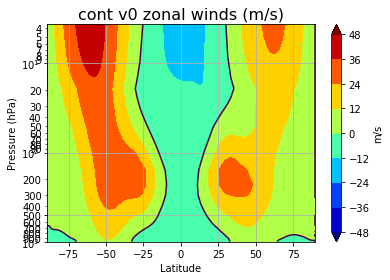

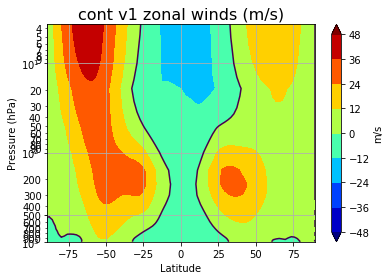

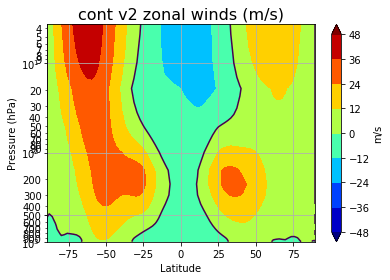

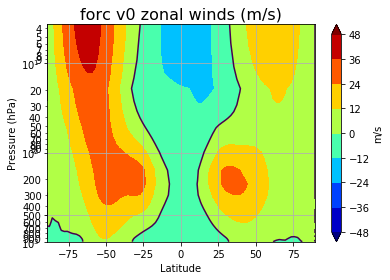

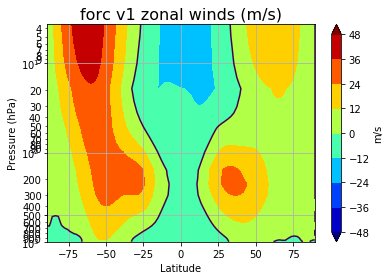

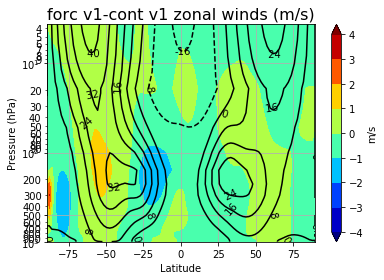

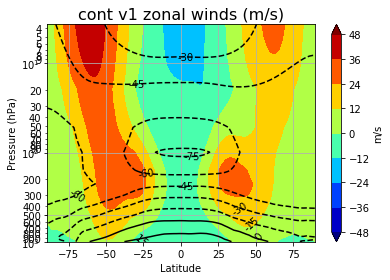

()

In [53]:
print(CRED+'Pkl read from new or existing...create different output names compared to input...'+CEND)

# output_type='pdf'
# output_type='png'

if(os.path.exists(output_name)):
  pickling_in = open(input_name, "rb")
  cafe_vars, \
  cafe_contv0_data, cafe_contv0_lev, cafe_contv0_lat, \
  cafe_contv1_data, cafe_contv1_lev, cafe_contv1_lat, \
  cafe_contv2_data, cafe_contv2_lev, cafe_contv2_lat, \
  cafe_forcv0_data, cafe_forcv0_lev, cafe_forcv0_lat, \
  cafe_forcv1_data, cafe_forcv1_lev, cafe_forcv1_lat \
  = pickle.load(pickling_in)
  pickling_in.close()  

cafe_contv0_data_var1,cafe_contv0_data_var2 = cafe_contv0_data
cafe_contv1_data_var1,cafe_contv0_data_var2 = cafe_contv1_data
cafe_contv2_data_var1,cafe_contv0_data_var2 = cafe_contv2_data
cafe_forcv0_data_var1,cafe_forcv0_data_var2 = cafe_forcv0_data
cafe_forcv1_data_var1,cafe_forcv1_data_var2 = cafe_forcv1_data

#print(cafe_contv1_data.shape)

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yscale.html
  
xysize=(12,8)
xysize=(6,4)

clevs_full=[-48,-36,-24,-12,0,12,24,36,48]
clevs_diff=[-4,-3,-2,-1,0,1,2,3,4]

shade_2d_simple(np.average(cafe_contv0_data_var1,axis=-1), \
  title='cont v0 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_contv0_lat, cafe_contv0_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, n_contour=[0])
#   output=('xsec',output_type))

shade_2d_simple(np.average(cafe_contv1_data_var1,axis=-1), \
  title='cont v1 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_contv1_lat, cafe_contv1_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, n_contour=[0])

shade_2d_simple(np.average(cafe_contv2_data_var1,axis=-1), \
  title='cont v2 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_contv2_lat, cafe_contv2_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, n_contour=[0])

#===============================================================================

# shade_2d_simple(np.average(cafe_contv2_data,axis=-1)-np.average(cafe_contv1_data,axis=-1), \
#   title='cont v2-v1 zonal winds', units='m/s', \
#   reverse_yaxis=True, yscale='log', \
#   xyvals=(cafe_contv2_lat, cafe_contv2_lev/100.), \
#   xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_diff, n_contour=[0])

#===============================================================================

shade_2d_simple(np.average(np.average(cafe_forcv0_data_var1,axis=-1),axis=0), \
  title='forc v0 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_forcv0_lat, cafe_forcv0_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, n_contour=[0])

shade_2d_simple(np.average(np.average(cafe_forcv1_data_var1,axis=-1),axis=0), \
  title='forc v1 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_forcv1_lat, cafe_forcv1_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, n_contour=[0])

shade_2d_simple(np.average(np.average(cafe_forcv1_data_var1,axis=-1),axis=0)-np.average(cafe_contv1_data_var1,axis=-1), \
  title='forc v1-cont v1 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_forcv1_lat, cafe_forcv1_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_diff, \
  contour_array=(cafe_forcv1_lat, cafe_forcv1_lev/100., np.average(cafe_contv0_data_var1,axis=-1)))

shade_2d_simple(np.average(cafe_contv0_data_var1,axis=-1), \
  title='cont v1 zonal winds', units='m/s', \
  reverse_yaxis=True, yscale='log', \
  xyvals=(cafe_forcv0_lat, cafe_forcv0_lev/100.), \
  xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ytik=[10,100,500,1000], grid=True, clevs=clevs_full, \
  contour_array=(cafe_forcv1_lat, cafe_forcv1_lev/100., np.average(cafe_contv0_data_var2,axis=-1)-273.15))

# shade_2d_simple(np.average(cafe_contv1_data,axis=2), \
#   title='zonal winds', units='m/s', \
#   reverse_yaxis=True, yscale='linear', \
#   xyvals=(cafe_control_file_var_lat, cafe_control_file_var_lev/100.), \
#   xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)') #, xlim=(-90,90),ylim=(0,200))

# shade_2d_simple(np.average(cafe_contv1_data,axis=2), \
#   title='zonal winds', units='m/s', \
#   reverse_yaxis=True, yscale='symlog', \
#   xyvals=(cafe_control_file_var_lat, cafe_control_file_var_lev/100.), \
#   xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)')

# shade_2d_simple(np.average(cafe_contv1_data,axis=2), \
#   title='zonal winds', units='m/s', \
#   reverse_yaxis=True, yscale='log', \
#   xyvals=(cafe_control_file_var_lat, cafe_control_file_var_lev/100.), \
#   xysize=xysize, xlab='Latitude', ylab='Pressure (hPa)', ylim=(10,1000), \
#   ytik=[10,100,500,1000])